In [1]:
import pandas as pd
import numpy as np

# Data Loading

In [2]:
data = pd.read_csv('Data/spam.csv', encoding='ISO-8859-1')
data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5177,ham,Very strange. and are watching the 2nd one n...,NaN,NaN,NaN
1605,ham,When you came to hostel.,NaN,NaN,NaN
3280,ham,I tot it's my group mate... Lucky i havent rep...,NaN,NaN,NaN
1259,ham,We have sent JD for Customer Service cum Accou...,NaN,NaN,NaN
3352,ham,I emailed yifeng my part oredi.. Can Ì_ get it...,NaN,NaN,NaN
4972,ham,Oops I was in the shower when u called. Hey a ...,NaN,NaN,NaN
4245,ham,Well welp is sort of a semiobscure internet thing,NaN,NaN,NaN
2162,ham,1) Go to write msg 2) Put on Dictionary mode 3...,NaN,NaN,NaN
3109,spam,Good Luck! Draw takes place 28th Feb 06. Good ...,NaN,NaN,NaN
835,ham,Good Morning my Dear........... Have a great &...,NaN,NaN,NaN


In [3]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Data Cleaning:**

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.drop_duplicates(inplace=True)
data.shape

(5169, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


# **EDA**:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

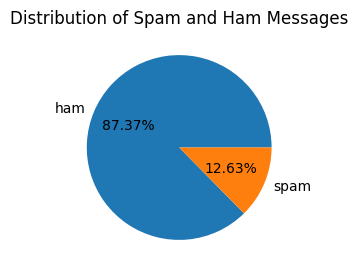

In [10]:
plt.figure(figsize=(4, 3))
plt.pie(data['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.2f%%')
plt.title('Distribution of Spam and Ham Messages')
plt.show()
# Data is imbalanced

## NLTK starts:

In [11]:
import nltk

In [12]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [13]:
data['num_chars'] = data['message'].apply(len)
data['num_words'] = data['message'].apply(lambda x: len(nltk.word_tokenize(x)))
data['num_sent'] = data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

data.head()

,label,message,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [14]:
data[['num_chars', 'num_words', 'num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [15]:
data[data['label'] == 0][['num_chars', 'num_words', 'num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [16]:
data[data['label'] == 1][['num_chars', 'num_words', 'num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


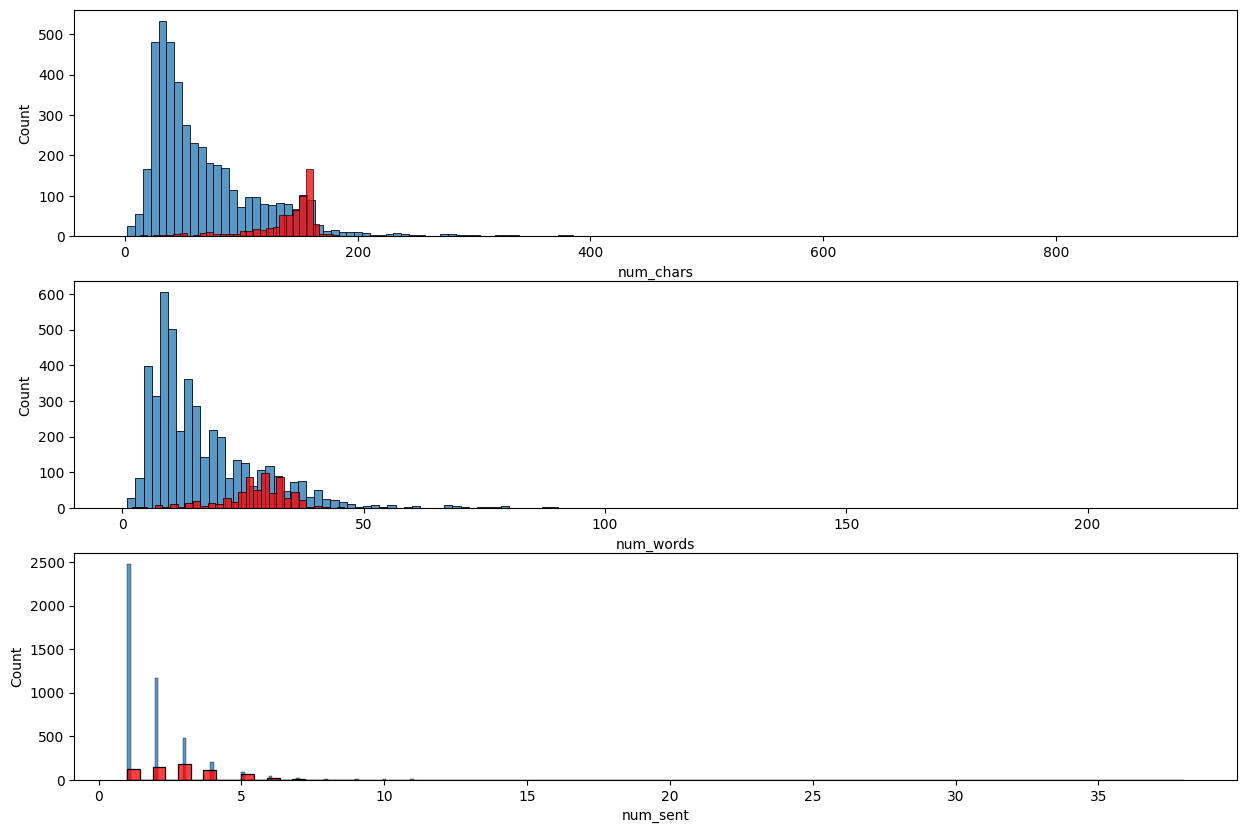

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(3,1,1)
sns.histplot(data[data['label'] == 0]['num_chars'])
sns.histplot(data[data['label'] == 1]['num_chars'], color = 'red')

plt.subplot(3,1,2)
sns.histplot(data[data['label'] == 0]['num_words'])
sns.histplot(data[data['label'] == 1]['num_words'], color = 'red')

plt.subplot(3,1,3)
sns.histplot(data[data['label'] == 0]['num_sent'])
sns.histplot(data[data['label'] == 1]['num_sent'], color = 'red')

plt.show()

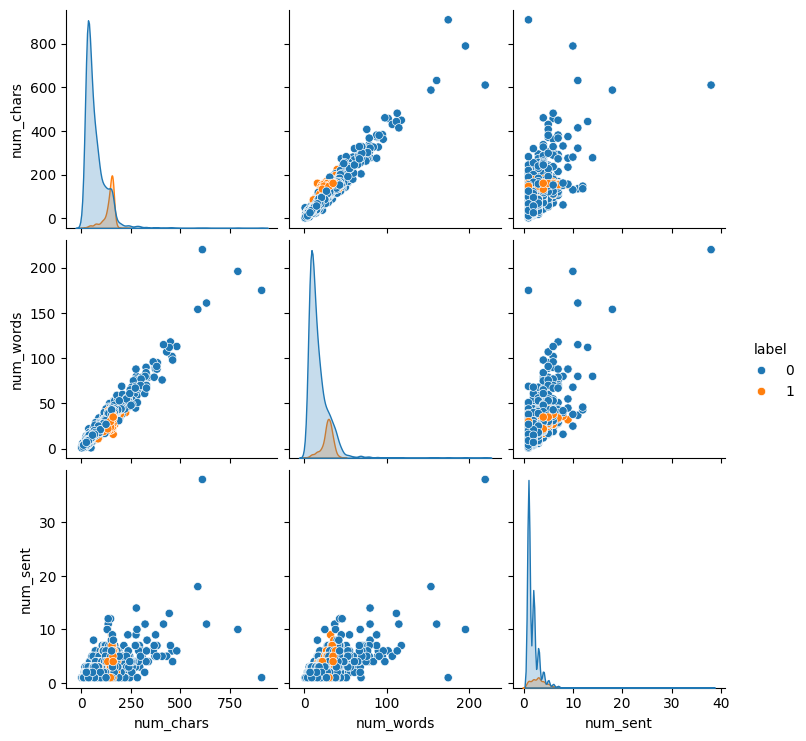

In [18]:
sns.pairplot(data, hue='label')

<Axes: >

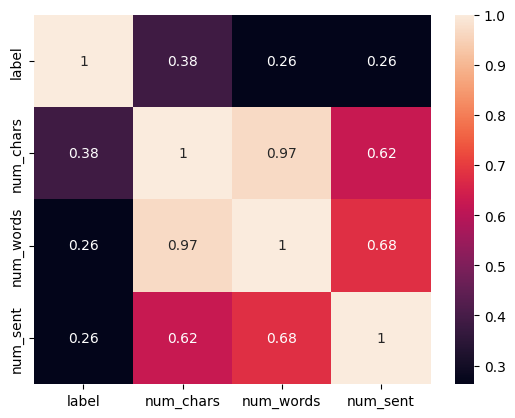

In [19]:
sns.heatmap(data.drop('message', axis=1).corr(), annot= True)

In [ ]:
# Label has very low correlation with word count, character count and sentence count.
# as character count and word count has very high correlation, we can drop one.

# **Data Preprocessing**

* Lower case
* Tokenization
* Removing Stopwords and punctuations
* Stemming



In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [22]:
from nltk.corpus import stopwords
import string

In [23]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)


In [24]:
data['trans_text'] = data['message'].apply(transform_text)
data.head()

,label,message,num_chars,num_words,num_sent,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [26]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

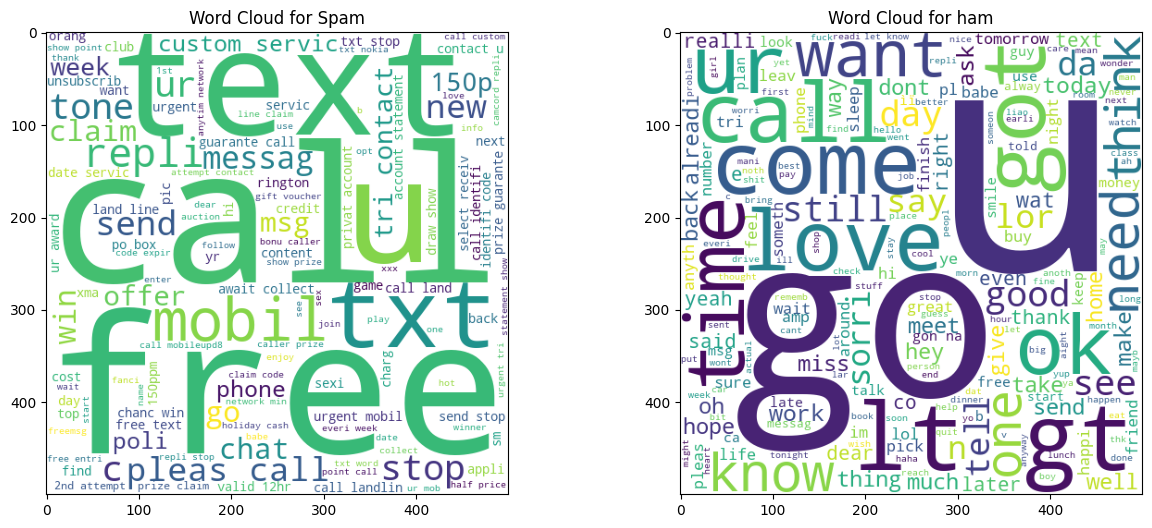

In [27]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
spam_wc = wc.generate(data[data['label'] == 1]['trans_text'].str.cat(sep=" "))
plt.title("Word Cloud for Spam")
plt.imshow(spam_wc)

plt.subplot(1,2,2)
ham_wc = wc.generate(data[data['label']==0]['trans_text'].str.cat(sep = " "))
plt.title("Word Cloud for ham")
plt.imshow(ham_wc)


In [28]:
spam_corpus=[]
for msg in data[data['label'] == 1]['trans_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)  # Gives an array of words of spam msgs

ham_corpus =[]
for msg in data[data['label'] == 0]['trans_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)



In [29]:
from collections import Counter
comm_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))   # Gives a dataframe of most common 30 words in spam_corpus, from an array of tuples ('word', 'num')
print(comm_spam)

          0    1
0      call  320
1      free  191
2         2  155
3       txt  141
4      text  122
5         u  119
6        ur  119
7     mobil  114
8      stop  104
9     repli  103
10    claim   98
11        4   97
12    prize   82
13      get   74
14      new   64
15   servic   64
16     tone   63
17     send   60
18   urgent   57
19    nokia   57
20  contact   56
21    award   55
22    phone   52
23     cash   51
24    pleas   51
25     week   49
26      win   48
27        c   45
28  collect   45
29      min   45


In [30]:
comm_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))   # Gives most common 30 words in ham_corpus, from an array of tuples ('word', 'num')

print(comm_ham)

        0    1
0       u  883
1      go  404
2     get  349
3      gt  288
4      lt  287
5       2  284
6    come  275
7     got  236
8    know  236
9    like  234
10   call  233
11   time  219
12     ok  217
13   love  216
14   good  213
15   want  208
16     ur  197
17    day  190
18   need  170
19    one  165
20    lor  159
21      4  156
22   home  152
23  think  149
24    see  147
25   take  143
26  still  143
27     da  142
28   tell  133
29   make  129


C:\Users\User\AppData\Local\Temp\ipykernel_1328\1362802379.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comm_spam[0], y=comm_spam[1], palette = 'rocket')
C:\Users\User\AppData\Local\Temp\ipykernel_1328\1362802379.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comm_ham[0], y=comm_ham[1], palette = 'rocket')


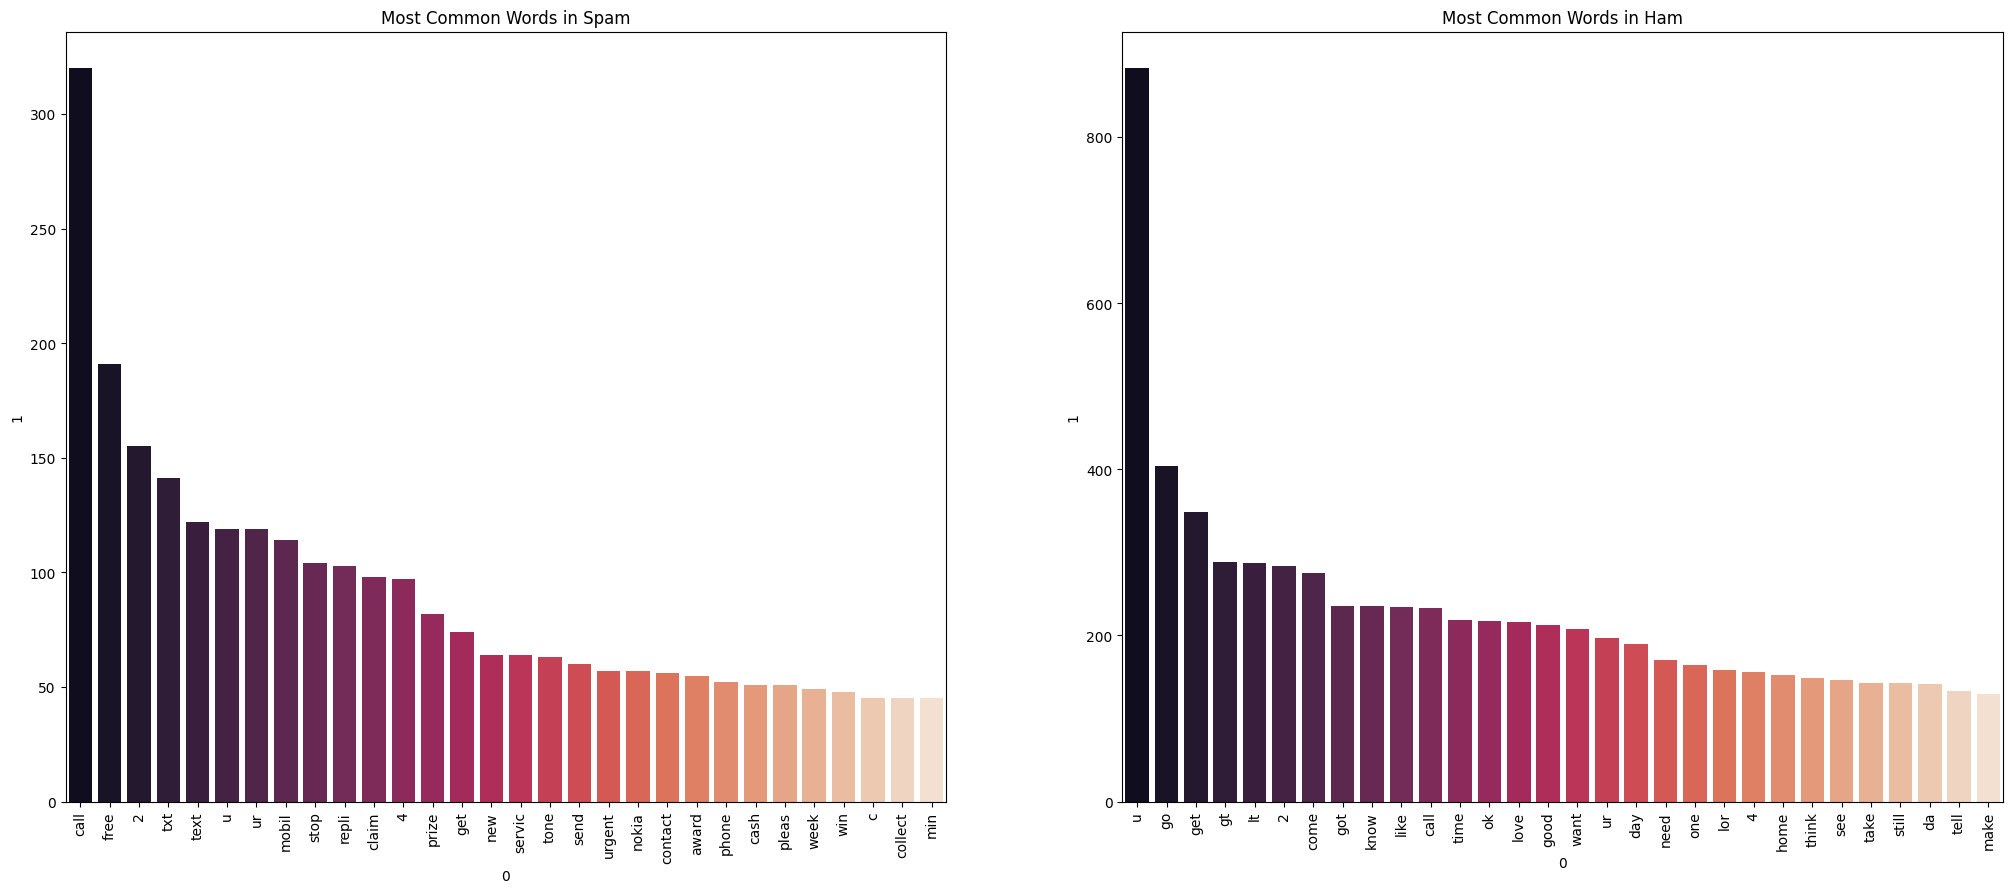

In [31]:
plt.figure(figsize = (25,10))

plt.subplot(1,2,1)
sns.barplot(x=comm_spam[0], y=comm_spam[1], palette = 'rocket')
plt.xticks(rotation = 90)
plt.title("Most Common Words in Spam")

plt.subplot(1,2,2)
sns.barplot(x=comm_ham[0], y=comm_ham[1], palette = 'rocket')
plt.xticks(rotation = 90)
plt.title("Most Common Words in Ham")

plt.show()

# **Model Building**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [35]:
''' Here we will continue with Tf-idf for vectorization of the words,
but CountVectorizer also can be used for bag of words techique. Here the code for this:
X = cv.fit_transform(data['trans_text']).toarray()
y = data['label'].values
'''

" Here we will continue with Tf-idf for vectorization of the words,\nbut CountVectorizer also can be used for bag of words techique. Here the code for this:\nX = cv.fit_transform(data['trans_text']).toarray()\ny = data['label'].values\n"

## Vectorization using tfidf

### Generate synthetic samples for the minority class using SMOTE

In [53]:
X = tfidf.fit_transform(data['trans_text']).toarray()
y = data['label'].values

# Size of the data
print("Size of the data: ", X.shape)

Size of the data:  (5169, 3000)


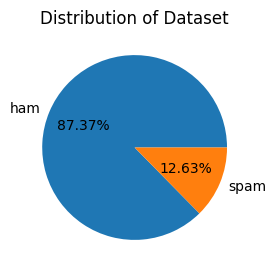

In [43]:
plt.figure(figsize=(4, 3))
plt.pie(np.bincount(y), labels=['ham', 'spam'], autopct='%1.2f%%')
plt.title('Distribution of Dataset')
plt.show()

In [54]:
# SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)
# Use X_bal, y_bal for training

# Size of the data before and after SMOTE
print("Size of the data before SMOTE: ", X.shape)   
print("Size of the data after SMOTE: ", X_bal.shape)

Size of the data before SMOTE:  (5169, 3000)
Size of the data after SMOTE:  (9032, 3000)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

In [55]:
# count of training and testing data
print(f"Training data count: {X_train.shape[0]}")   
print(f"Testing data count: {X_test.shape[0]}")

Training data count: 7225
Testing data count: 1807


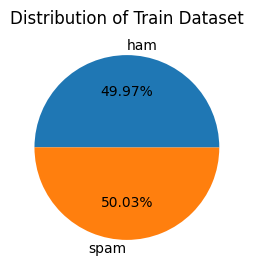

In [48]:
plt.figure(figsize=(4, 3))
plt.pie(np.bincount(y_train), labels=['ham', 'spam'], autopct='%1.2f%%')
plt.title('Distribution of Train Dataset')
plt.show()

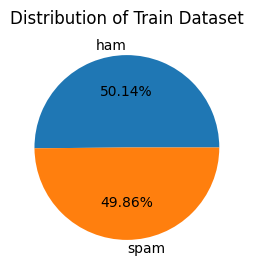

In [49]:
plt.figure(figsize=(4, 3))
plt.pie(np.bincount(y_test), labels=['ham', 'spam'], autopct='%1.2f%%')
plt.title('Distribution of Train Dataset')
plt.show()

### Training

In [ ]:
models = {
    'mnb': MultinomialNB(),
    'lr': LogisticRegression(solver='liblinear', penalty='l1'),
    'svc': SVC(kernel='sigmoid', gamma = 1.0),
    'knn': KNeighborsClassifier(),
    'dt': DecisionTreeClassifier(max_depth=5),
    'rf': RandomForestClassifier(n_estimators=50, random_state=42),
    'abc': AdaBoostClassifier(n_estimators=50, random_state=42),
    'bc': BaggingClassifier(n_estimators=50, random_state=42),
    'gbdt': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'xgb': XGBClassifier(n_estimators=50, random_state=42)
}


In [60]:
perform_dict = {}
for model in models:
    models[model].fit(X_train, y_train)
    y_pred = models[model].predict(X_test)
    perform_dict[model] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred)]
    print(f"Accuracy for {model}: {accuracy_score(y_test, y_pred)}")
    print(f"Precision for {model}: {precision_score(y_test, y_pred)}")
    print(f"Confusion Matrix for {model}:\n {confusion_matrix(y_test, y_pred)}")
    print('-'*50)

# Best model based on Precision
best_model = max(perform_dict, key=lambda x: perform_dict[x][1])
print(f"Best model based on Precision: {best_model} with Precision: {perform_dict[best_model][1]}")

Accuracy for mnb: 0.9673491975650249
Precision for mnb: 0.9716157205240175
Confusion Matrix for mnb:
 [[858  26]
 [ 33 890]]
--------------------------------------------------
Accuracy for lr: 0.9418926397343663
Precision for lr: 0.9679633867276888
Confusion Matrix for lr:
 [[856  28]
 [ 77 846]]
--------------------------------------------------
Accuracy for svc: 0.9667957941339236
Precision for svc: 0.9490114464099896
Confusion Matrix for svc:
 [[835  49]
 [ 11 912]]
--------------------------------------------------
Accuracy for knn: 0.6270060874377421
Precision for knn: 0.5784499054820416
Confusion Matrix for knn:
 [[215 669]
 [  5 918]]
--------------------------------------------------
Accuracy for dt: 0.874377421140011
Precision for dt: 0.9382871536523929
Confusion Matrix for dt:
 [[835  49]
 [178 745]]
--------------------------------------------------
Accuracy for rf: 0.9933591588267847
Precision for rf: 0.9956474428726877
Confusion Matrix for rf:
 [[880   4]
 [  8 915]]
-----

In [57]:
perform_df = pd.DataFrame([
    {'Algorithm(max_fet = 3000)': algo, 'Accuracy(max_fet = 3000)': scores[0], 'Precision(max_fet = 3000)': scores[1]}
    for algo, scores in perform_dict.items()
])
perform_df

,Algorithm(max_fet = 3000),Accuracy(max_fet = 3000),Precision(max_fet = 3000)
0,mnb,0.969563,0.967920
1,lr,0.933592,0.964328
2,svc,0.957388,0.934599
3,knn,0.619812,0.568327
4,dt,0.885445,0.917067
5,rf,0.988932,0.992179
6,abc,0.880465,0.932996
7,bc,0.967903,0.950802
8,etc,0.991699,0.992222
9,gbdt,0.919757,0.950000


## Vectorization with CountVectorizer

In [ ]:
cv = CountVectorizer()
X_cv = cv.fit_transform(data['trans_text']).toarray()
y_cv = data['label'].values
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.2, random_state=42)

In [ ]:
perform_dict_cv = {}
for model in models:
    models[model].fit(X_train_cv, y_train_cv)
    y_pred_cv = models[model].predict(X_test_cv)
    perform_dict_cv[model] = [accuracy_score(y_test_cv, y_pred_cv), precision_score(y_test_cv, y_pred_cv)]

perform_df_cv = pd.DataFrame([
    {'Algorithm(countvectorizer)': algo, 'Accuracy(countvectorizer)': scores[0], 'Precision(countvectorizer)': scores[1]}
    for algo, scores in perform_dict_cv.items()
])
perform_df_cv

,Algorithm(countvectorizer),Accuracy(countvectorizer),Precision(countvectorizer)
0,mnb,0.964217,0.834437
1,lr,0.970986,0.973684
2,svc,0.926499,0.742188
3,knn,0.907157,1.000000
4,dt,0.926499,0.942857
5,rf,0.971954,1.000000
6,abc,0.919729,0.936508
7,bc,0.962282,0.915966
8,etc,0.976789,0.991379
9,gbdt,0.943907,0.944444


## Tf-idf with no feature

In [ ]:
tfidf_no_fet = TfidfVectorizer()
X_nf = tfidf_no_fet.fit_transform(data['trans_text']).toarray()
y_nf = data['label'].values
X_train_nf, X_test_nf, y_train_nf, y_test_nf = train_test_split(X_nf, y_nf, test_size=0.2, random_state=2)

In [ ]:
perform_dict_nf = {}
for model in models:
    models[model].fit(X_train_nf, y_train_nf)
    y_pred_nf = models[model].predict(X_test_nf)
    perform_dict_nf[model] = [accuracy_score(y_test_nf, y_pred_nf), precision_score(y_test_nf, y_pred_nf)]

perform_df_nf = pd.DataFrame([
    {'Algorithm': algo, 'Accuracy': scores[0], 'Precision': scores[1]}
    for algo, scores in perform_dict_nf.items()
])
perform_df_nf

,Algorithm,Accuracy,Precision
0,mnb,0.959381,1.000000
1,lr,0.951644,0.940000
2,svc,0.972921,0.974138
3,knn,0.900387,1.000000
4,dt,0.936170,0.846154
5,rf,0.971954,1.000000
6,abc,0.924565,0.840909
7,bc,0.958414,0.862595
8,etc,0.972921,0.982456
9,gbdt,0.952611,0.923810


## With MinMax Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_nf = scaler.fit_transform(X_nf)

In [ ]:
perform_dict_sc = {}
for model in models:
    models[model].fit(X_train_nf, y_train_nf)
    y_pred_nf = models[model].predict(X_test_nf)
    perform_dict_sc[model] = [accuracy_score(y_test_nf, y_pred_nf), precision_score(y_test_nf, y_pred_nf)]

perform_df_sc = pd.DataFrame([
    {'Algorithm(MinMax Sc)': algo, 'Accuracy(MinMax Sc)': scores[0], 'Precision(MinMax Sc)': scores[1]}
    for algo, scores in perform_dict_nf.items()
])
perform_df_sc

,Algorithm(MinMax Sc),Accuracy(MinMax Sc),Precision(MinMax Sc)
0,mnb,0.959381,1.000000
1,lr,0.951644,0.940000
2,svc,0.972921,0.974138
3,knn,0.900387,1.000000
4,dt,0.936170,0.846154
5,rf,0.971954,1.000000
6,abc,0.924565,0.840909
7,bc,0.958414,0.862595
8,etc,0.972921,0.982456
9,gbdt,0.952611,0.923810


In [ ]:
# appending the num_character col to X

In [ ]:
X_new = np.hstack((X,data['num_chars'].values.reshape(-1,1)))
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=2)

In [ ]:
perform_dict_new = {}
for model in models:
    models[model].fit(X_train_new, y_train_new)
    y_pred_new = models[model].predict(X_test_new)
    perform_dict_new[model] = [accuracy_score(y_test_new, y_pred_new), precision_score(y_test_new, y_pred_new)]

perform_df_new = pd.DataFrame([
    {'Algorithm(num_chars_include)': algo, 'Accuracy(num_chars_include)': scores[0], 'Precision(num_chars_include)': scores[1]}
    for algo, scores in perform_dict_new.items()
])
perform_df_new

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Algorithm(num_chars_include),Accuracy(num_chars_include),Precision(num_chars_include)
0,mnb,0.940039,1.000000
1,lr,0.959381,0.952830
2,svc,0.866538,0.000000
3,knn,0.931335,0.813084
4,dt,0.948743,0.897196
5,rf,0.972921,0.982456
6,abc,0.944874,0.893204
7,bc,0.960348,0.864662
8,etc,0.980658,0.983607
9,gbdt,0.950677,0.930693


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rf= RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc), ('rf', rf)],voting='soft')

voting.fit(X_train,y_train)

y_pred_voting = voting.predict(X_test)

print(f"Accuracy for Voting Classifier: {accuracy_score(y_test, y_pred_voting)}")
print(f"Precision for Voting Classifier: {precision_score(y_test, y_pred_voting)}")
print(f"Confusion Matrix for Voting Classifier:\n {confusion_matrix(y_test, y_pred_voting)}")


Accuracy for Voting Classifier: 0.9796905222437138
Precision for Voting Classifier: 0.9915966386554622
Confusion Matrix for Voting Classifier:
 [[895   1]
 [ 20 118]]


# **Final Model: **

In [61]:

final_model = RandomForestClassifier(n_estimators=50, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(f"Accuracy for Final Model: {accuracy_score(y_test, y_pred)}")
print(f"Precision for Final Model: {precision_score(y_test, y_pred)}")
print(f"Confusion Matrix for Final Model:\n {confusion_matrix(y_test, y_pred)}")

Accuracy for Final Model: 0.9933591588267847
Precision for Final Model: 0.9956474428726877
Confusion Matrix for Final Model:
 [[880   4]
 [  8 915]]


## Save the model


In [66]:
import pickle

# Save trained model
with open('saved_models/model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

# Save TF-IDF vectorizer
with open('saved_models/tfidf.pkl', 'wb') as tfidf_file:
    pickle.dump(tfidf, tfidf_file)


In [69]:
# Load model
with open('saved_models/model.pkl', 'rb') as model_file:
    final_model = pickle.load(model_file)

# Load vectorizer
with open('saved_models/tfidf.pkl', 'rb') as tfidf_file:
    tfidf = pickle.load(tfidf_file)

# Use for prediction
text = ["money back guarantee, no questions asked, click here to claim your refund."]
vec = tfidf.transform(text).toarray()
print(final_model.predict(vec))


[1]
